In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
customer_churn = pd.read_csv('customer_churn.csv')

In [4]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
# data visulaization

In [7]:
value_counts = customer_churn['InternetService'].value_counts()

Text(0.5, 1.0, 'Distribution of Internet Service')

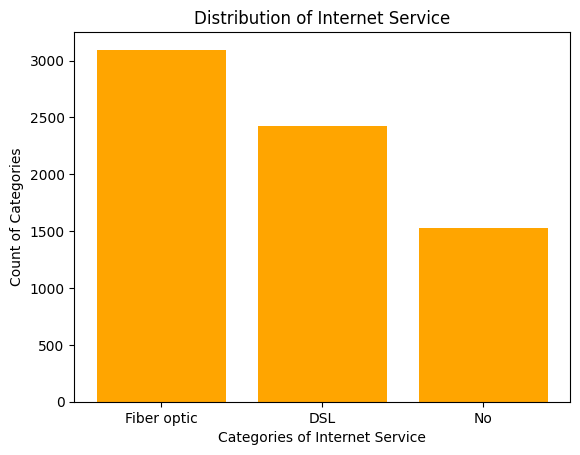

In [8]:
plt.bar(value_counts.keys().tolist(), value_counts.tolist(), color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, 'Distribution of Tenure')

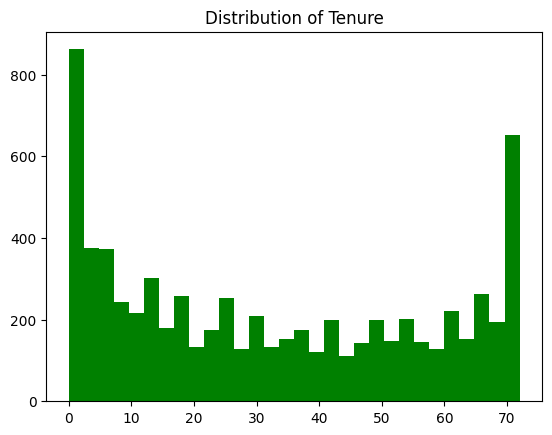

In [9]:
plt.hist(customer_churn['tenure'], bins=30, color='green')
plt.title('Distribution of Tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

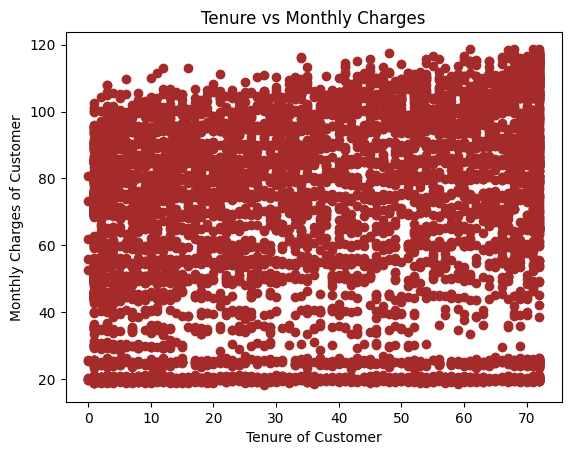

In [10]:
plt.scatter(x=customer_churn['tenure'], y=customer_churn['MonthlyCharges'], color='brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')

[Text(0.5, 0, 'Contract'), Text(0, 0.5, 'Tenure')]

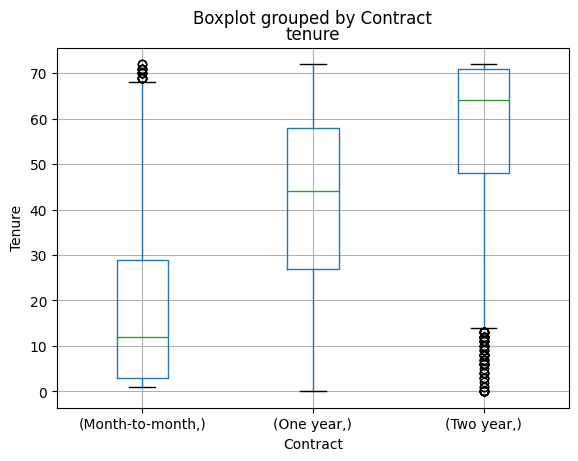

In [11]:
ax = customer_churn.boxplot(column=['tenure'], by=['Contract'])
ax.set(xlabel="Contract", ylabel="Tenure")

In [12]:
# linear regression

In [13]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
x = customer_churn[['tenure']]
y = customer_churn[['MonthlyCharges']]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

In [16]:
regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(x_test)
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

29.394584027273893

In [20]:
# logistic regression

In [21]:
x = customer_churn[['MonthlyCharges']]
y = customer_churn[['Churn']]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

log_model.fit(x_train, y_train)

LogisticRegression()

In [25]:
y_pred = log_model.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
confusion_matrix(y_test, y_pred)

array([[1815,    0],
       [ 651,    0]], dtype=int64)

In [28]:
accuracy_score(y_test, y_pred)

0.7360097323600974

In [29]:
x = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn[['Churn']]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [31]:
log_model = LogisticRegression()

log_model.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred = log_model.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [33]:
confusion_matrix(y_test, y_pred)

array([[934, 107],
       [212, 156]], dtype=int64)

In [34]:
accuracy_score(y_test, y_pred)

0.7735982966643009

In [35]:
# decision tree

In [36]:
x = customer_churn[['tenure']]
y = customer_churn['Churn']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
confusion_matrix(y_test, y_pred)

array([[934, 107],
       [212, 156]], dtype=int64)

In [41]:
accuracy_score(y_test, y_pred)

0.7735982966643009

In [42]:
# random forest classifier

In [43]:
x = customer_churn[['tenure', 'MonthlyCharges']]
y = customer_churn['Churn']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = rf.predict(x_test)

In [48]:
confusion_matrix(y_test, y_pred)

array([[1344,  216],
       [ 319,  234]], dtype=int64)

In [49]:
accuracy_score(y_test, y_pred)

0.7468054898248935